Mounting my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading the sample video(It's 59-minute long)

In [ ]:
!wget "https://archive.org/download/WildlifeDocumentaries/Frozen%20Planet%20-%20S01%20-%20E08%20-%20The%20Epic%20Journey.mp4"

--2025-01-19 00:20:33--  https://archive.org/download/WildlifeDocumentaries/Frozen%20Planet%20-%20S01%20-%20E08%20-%20The%20Epic%20Journey.mp4
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dn720700.ca.archive.org/0/items/WildlifeDocumentaries/Frozen%20Planet%20-%20S01%20-%20E08%20-%20The%20Epic%20Journey.mp4 [following]
--2025-01-19 00:20:34--  https://dn720700.ca.archive.org/0/items/WildlifeDocumentaries/Frozen%20Planet%20-%20S01%20-%20E08%20-%20The%20Epic%20Journey.mp4
Resolving dn720700.ca.archive.org (dn720700.ca.archive.org)... 204.62.246.85
Connecting to dn720700.ca.archive.org (dn720700.ca.archive.org)|204.62.246.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368538066 (351M) [video/mp4]
Saving to: ‘Frozen Planet - S01 - E08 - The Epic Journey.mp4’

Frozen Planet - S01 100%[===================>] 351.46M 

In [ ]:
!pwd

/content


Renaming the video

In [ ]:
!mv "Frozen Planet - S01 - E08 - The Epic Journey.mp4" testVid.mp4

Moving the video to my drive

In [ ]:
!mv testVid.mp4 /content/drive/MyDrive/MiniProject/testVid.mp4

FPS: 25.0
Frame Count: 88619
Duration: 3544.76
Number of frames to extract: 12
/content/drive/MyDrive/MiniProject/frames/Q1//frame_1.timestamp_00-00-00.png
/content/drive/MyDrive/MiniProject/frames/Q1//frame_11078.timestamp_00-07-23.png
/content/drive/MyDrive/MiniProject/frames/Q1//frame_22155.timestamp_00-14-46.png
/content/drive/MyDrive/MiniProject/frames/Q2//frame_22156.timestamp_00-14-46.png
/content/drive/MyDrive/MiniProject/frames/Q2//frame_33233.timestamp_00-22-09.png
/content/drive/MyDrive/MiniProject/frames/Q2//frame_44310.timestamp_00-29-32.png
/content/drive/MyDrive/MiniProject/frames/Q3//frame_44311.timestamp_00-29-32.png
/content/drive/MyDrive/MiniProject/frames/Q3//frame_55388.timestamp_00-36-55.png
/content/drive/MyDrive/MiniProject/frames/Q3//frame_66465.timestamp_00-44-18.png
/content/drive/MyDrive/MiniProject/frames/Q4//frame_66466.timestamp_00-44-18.png
/content/drive/MyDrive/MiniProject/frames/Q4//frame_77542.timestamp_00-51-41.png
/content/drive/MyDrive/MiniProject

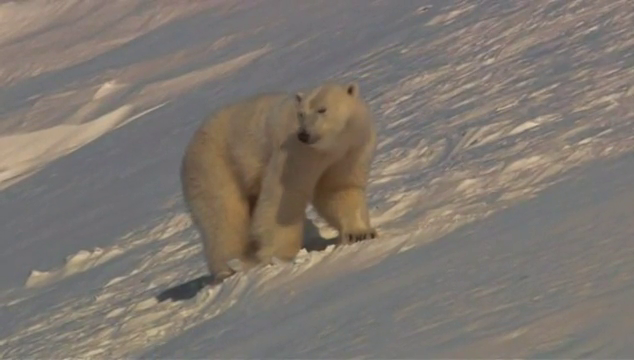

frame_33233.timestamp_00-22-09.png


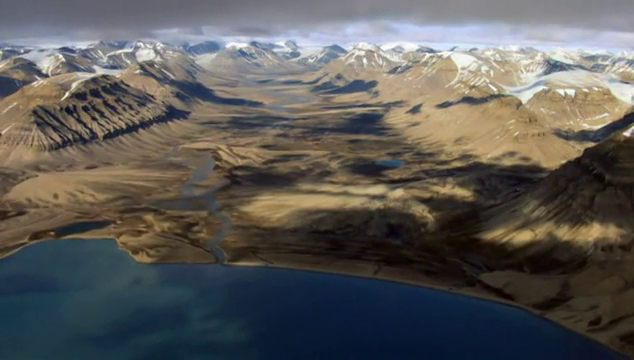

frame_66465.timestamp_00-44-18.png


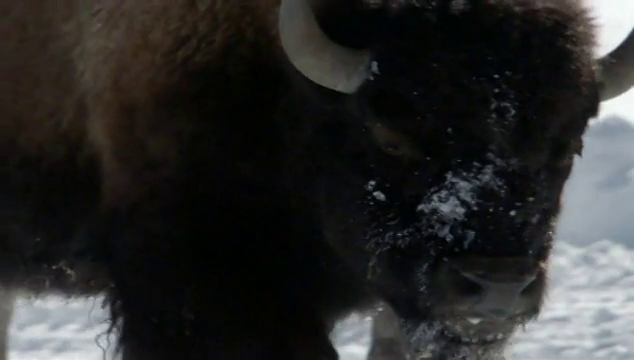

frame_77542.timestamp_00-51-41.png


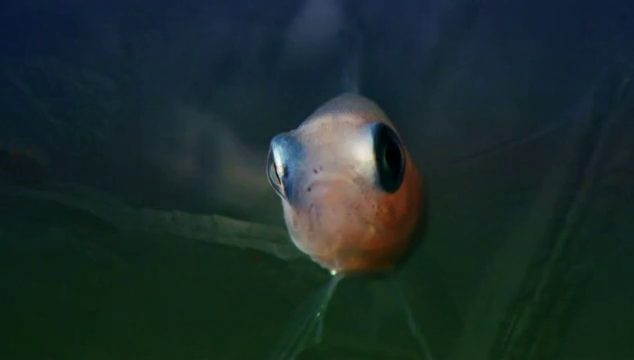

In [25]:
#--------------------------------------------
# author: sngr0x0
# created: 15.01.2025 07:45:28
#--------------------------------------------

import cv2 as cv
import os
import datetime
import random
from google.colab.patches import cv2_imshow

#loading the video
# vidpath= input("Enter your file's path:\n")
vidpath = '/content/drive/MyDrive/MiniProject/testVid.mp4'

#VideoCapture can work with various of video file types (.mp4, .avi, .mov, .mpeg, .flv, .wmv)
vidcap = cv.VideoCapture(vidpath)

while not vidcap.isOpened():
  print("Can't open the file. Double-check your file's path.")
  vidpath= input("Enter your file's path:\n")
  vidcap = cv.VideoCapture(vidpath)

#outputting frames
# frames_path = input("Enter the directory where frames can get stored:\n")
frames_path = "/content/drive/MyDrive/MiniProject/frames"
if not os.path.exists(frames_path):
  os.makedirs(frames_path)

#getting video information
frame_rate = vidcap.get(cv.CAP_PROP_FPS)
frame_count = int(vidcap.get(cv.CAP_PROP_FRAME_COUNT))
#returned value is float; that's why we cast it.
#Plus, the get() always retuns a floast regardless of the property
#When you use the frame count for indexing, looping, or frame extraction, it must be an integer
duration = frame_count / frame_rate

print(f"FPS: {frame_rate}\nFrame Count: {frame_count}\nDuration: {duration}")

#Quartiles
#format => (quartile_start, quartile_end, nthQuartile)
q1 = (0 , int(frame_count/4), 1)
q2 = (q1[1]+1, int(frame_count/2), 2)
q3 = (q2[1]+1, int(frame_count*3/4), 3)
q4 = (q3[1]+1, int(frame_count-1), 4)

quartiles= (q1, q2, q3, q4)

#Frames Extraction (frames are 0-indexed)
#This code only extracts these frames:
#quartile's first frame
#quartile's second frame
#quartile's middle frame

print("Number of frames to extract:", len(quartiles) * 3)
for q in quartiles:
  output_path = f"{frames_path}/Q{q[2]}/"
  #making sure the path does exist
  if not os.path.exists(output_path):
    os.makedirs(output_path)
  #indices of frames to be extracted
  output_frames = [q[0], (int((q[1]-q[0])/2))+q[0], q[1]]
  for index in output_frames:
      vidcap.set(cv.CAP_PROP_POS_FRAMES, index)
      success, frame = vidcap.read()
      try:
        frame_timestamp= index/frame_rate
        readable_timestamp= datetime.datetime.fromtimestamp(frame_timestamp)
        #I chose it to be index/frame_rate instead of index + 1 because if we think about the first frame, its timestamp is actually ZERO
        #So we can't add one to it and say its timestamp is 00:00:01.
        #However, we shall add one when it comes to its place and say that it's the 1st frame. (rather than the 0st which doesn't make any sense)
        imwrite_path = f"{output_path}/frame_{index+1}.timestamp_{readable_timestamp.strftime('%H-%M-%S')}.png"
        cv.imwrite(imwrite_path, frame) #The +1 is to begin counting frames from 1 rather than 0
        print(imwrite_path)
      except Exception as e:
        print("Failed to save the frame due to:\n", str(e))

#outputting 1 frame from each quarter:
print("----------------------------------------------------------")
print("A random frame from each quartile:")
for q in quartiles:
  quartile_frames = os. listdir(f"{frames_path}/Q{q[2]}/")
  show_me = random.choice(quartile_frames)
  frame = cv.imread(f"{frames_path}/Q{q[2]}/{show_me}")
  print(show_me)
  cv2_imshow(frame)